### Classification of Weather images in five categories 

This code is to create a classfication model using Tensorflow and Keras, and then checking it on a confusion matrix.
Set the location of the Dataset in Code cell [2].

In [ ]:
import numpy as np #Operations in arrays
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D #Layers of neural network
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [ ]:
# Organize data into train, valid, test dirs
os.chdir('C:/Users/Shreyansh Bhura/Onedrive/Desktop/Weather') # SET THE DATABASE LOCATION ACCORDING TO YOUR COMPUTER
if os.path.isdir('train/cloudy') is False:
    os.makedirs('train/cloudy')
    os.makedirs('train/sunrise')
    os.makedirs('train/shine')
    os.makedirs('train/rain')
    os.makedirs('train/foggy')
    os.makedirs('valid/cloudy')
    os.makedirs('valid/sunrise')
    os.makedirs('valid/shine')
    os.makedirs('valid/rain')
    os.makedirs('valid/foggy')
    os.makedirs('test/cloudy')
    os.makedirs('test/sunrise')
    os.makedirs('test/shine')
    os.makedirs('test/rain')
    os.makedirs('test/foggy')

    for i in random.sample(glob.glob('sunrise*'), 250):
        shutil.move(i, 'train/sunrise')      
    for i in random.sample(glob.glob('cloudy*'), 220):
        shutil.move(i, 'train/cloudy')
    for i in random.sample(glob.glob('shine*'), 180):
        shutil.move(i, 'train/shine')      
    for i in random.sample(glob.glob('rain*'), 220):
        shutil.move(i, 'train/rain')
    for i in random.sample(glob.glob('foggy*'), 220):
        shutil.move(i, 'train/foggy')
    for i in random.sample(glob.glob('sunrise*'), 42):
        shutil.move(i, 'valid/sunrise')        
    for i in random.sample(glob.glob('cloudy*'), 39):
        shutil.move(i, 'valid/cloudy')
    for i in random.sample(glob.glob('shine*'), 39):
        shutil.move(i, 'valid/shine')        
    for i in random.sample(glob.glob('rain*'), 29):
        shutil.move(i, 'valid/rain')
    for i in random.sample(glob.glob('foggy*'), 29):
        shutil.move(i, 'valid/foggy')
    for i in random.sample(glob.glob('sunrise*'), 46):
        shutil.move(i, 'test/sunrise')      
    for i in random.sample(glob.glob('cloudy*'), 36):
        shutil.move(i, 'test/cloudy')
    for i in random.sample(glob.glob('shine*'), 29):
        shutil.move(i, 'test/shine')      
    for i in random.sample(glob.glob('rain*'), 49):
        shutil.move(i, 'test/rain')
    for i in random.sample(glob.glob('foggy*'), 49):
        shutil.move(i, 'test/foggy')

os.chdir('../../')


In [ ]:
train_path = 'Desktop/Weather/train'
valid_path = 'Desktop/Weather/valid'
test_path = 'Desktop/Weather/test'

In [ ]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['cloudy', 'sunrise','shine','rain','foggy'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cloudy', 'sunrise','shine','rain','foggy'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['cloudy', 'sunrise','shine','rain','foggy'], batch_size=10, shuffle=True)

Found 1104 images belonging to 5 classes.
Found 192 images belonging to 5 classes.
Found 201 images belonging to 5 classes.


In [ ]:
imgs, labels = next(train_batches)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

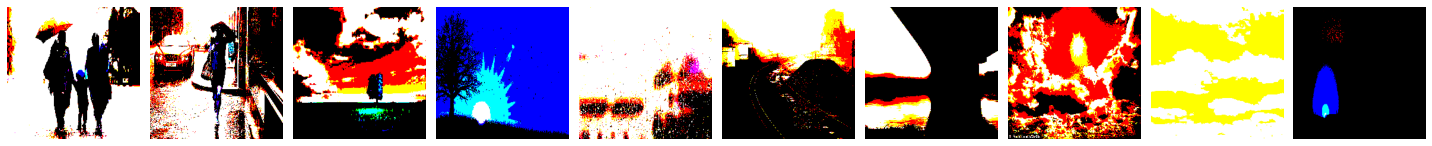

[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plotImages(imgs)
print(labels)

In [ ]:
# Hidden layers

model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=5, activation='softmax')
])

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 5)                 1003525   
Total params: 1,022,917
Trainable params: 1,022,917
Non-trainable params: 0
______________________________________________

In [ ]:
model.fit(x=train_batches,
    steps_per_epoch=len(train_batches),
    validation_data=valid_batches,
    validation_steps=len(valid_batches),
    epochs=10,
    verbose=1)

Epoch 1/10
111/111 [==============================] - 39s 355ms/step - loss: 32.7221 - accuracy: 0.6114 - val_loss: 10.4640 - val_accuracy: 0.7292
Epoch 2/10
111/111 [==============================] - 38s 342ms/step - loss: 4.6052 - accuracy: 0.7971 - val_loss: 5.6986 - val_accuracy: 0.7396
Epoch 3/10
111/111 [==============================] - 38s 343ms/step - loss: 1.1247 - accuracy: 0.9076 - val_loss: 3.3638 - val_accuracy: 0.7552
Epoch 4/10
111/111 [==============================] - 38s 342ms/step - loss: 0.6054 - accuracy: 0.9303 - val_loss: 4.0409 - val_accuracy: 0.7708
Epoch 5/10
111/111 [==============================] - 38s 342ms/step - loss: 0.4359 - accuracy: 0.9438 - val_loss: 10.8172 - val_accuracy: 0.6823
Epoch 6/10
111/111 [==============================] - 38s 345ms/step - loss: 0.5971 - accuracy: 0.9538 - val_loss: 4.5511 - val_accuracy: 0.7083
Epoch 7/10
111/111 [==============================] - 39s 349ms/step - loss: 0.2452 - accuracy: 0.9647 - val_loss: 5.2996 - val

In [ ]:
test_imgs, test_labels = next(test_batches)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

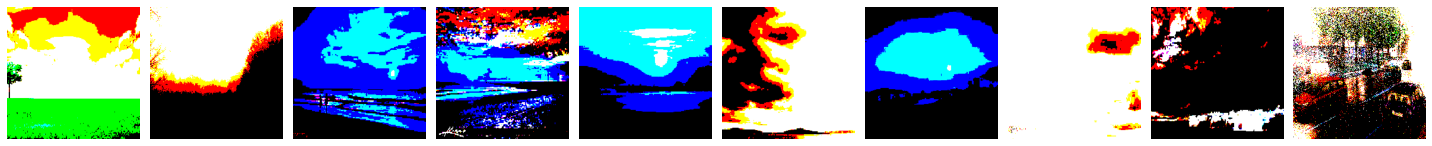

[[0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]]


In [ ]:
plotImages(test_imgs)
print(test_labels)

In [ ]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=1)

21/21 [==============================] - 2s 93ms/step


In [ ]:
np.round(predictions)

array([[0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4])

In [ ]:
test_batches.class_indices

{'cloudy': 0, 'sunrise': 1, 'shine': 2, 'rain': 3, 'foggy': 4}

Confusion matrix, without normalization
[[ 7 15  2  2  7]
 [11 11  7  6 15]
 [ 4  8  8  7  7]
 [ 7  8  5  8  8]
 [ 9 10  6  9 14]]


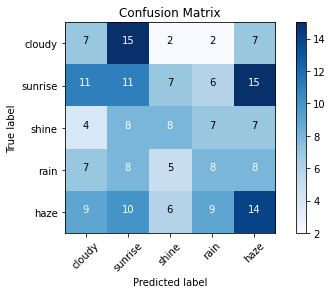

In [ ]:
cm_plot_labels = ['cloudy','sunrise','shine','rain','haze']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
model.save('weather_final_model.h5')
model.save_weights('weather_final_model_weights.h5')

In [ ]:
import cv2

img_width, img_height = 224, 224

def prepare(filepath):
    #IMG_SIZE = 70  # 50 in txt-based
    img_array = cv2.imread(filepath)  # read in the image, convert to grayscale
    new_array = cv2.resize(img_array, (img_width, img_height))  # resize image to match model's expected sizing
    return new_array.reshape(-1, img_width, img_height, 3)  # return the image with shaping that TF wants.

In [ ]:
File_path = 'C:/Users/Shreyansh Bhura/OneDrive/Desktop/haze_test1.jpg'

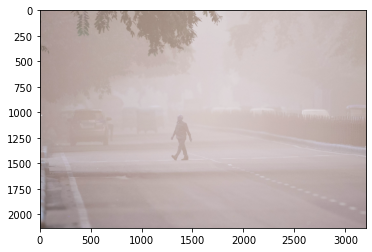

In [ ]:
img = cv2.imread(File_path)
plt.imshow(img)
plt.show()

In [ ]:
prediction = model.predict([prepare(File_path)])  # REMEMBER YOU'RE PASSING A LIST OF THINGS YOU WISH TO PREDICT
print(prediction)

[[2.9899905e-11 0.0000000e+00 1.2113924e-19 4.8997870e-22 1.0000000e+00]]


In [ ]:
x = np.round(prediction) # ROUNDING OF THE PREDICTION MATRIX

if x[0][0] == 1:
    print('The image depicts Sunrise.')
elif x[0][1] == 1:
    print('The image depicts Cloudy weather.')
elif x[0][2] == 1:
    print('The image depicts Sunshine.')
elif x[0][3] == 1:
    print('The image depicts Rainy weather.')
elif x[0][4] == 1:
    print('The image depicts Foggy weather.')   

The image depicts Foggy weather.
